# Day 25: Snowverload

[*Advent of Code 2023 day 25*](https://adventofcode.com/2023/day/25) and [*solution megathread*](https://redd.it/18qbsxs)

[![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.jupyter.org/github/UncleCJ/advent-of-code/blob/cj/2023/25/code.ipynb) [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/UncleCJ/advent-of-code/cj?filepath=2023%2F25%2Fcode.ipynb)

In [1]:
from IPython.display import HTML
import sys
sys.path.append('../../')


# %load_ext nb_mypy
# %nb_mypy On

In [2]:
import common


downloaded = common.refresh()
%store downloaded >downloaded

# %load_ext pycodestyle_magic
# %pycodestyle_on

Writing 'downloaded' (dict) to file 'downloaded'.


In [3]:
from IPython.display import HTML

HTML(downloaded['part1'])

In [4]:
example_input = '''jqt: rhn xhk nvd
rsh: frs pzl lsr
xhk: hfx
cmg: qnr nvd lhk bvb
rhn: xhk bvb hfx
bvb: xhk hfx
pzl: lsr hfx nvd
qnr: nvd
ntq: jqt hfx bvb xhk
nvd: lhk
lsr: lhk
rzs: qnr cmg lsr rsh
frs: qnr lhk lsr'''

In [5]:
from typing import Iterable
import networkx as nx 

def parse_input(input: Iterable[str]) -> nx.Graph:
    g = nx.Graph()
    for line in input:
       n_from, ns_to = line.split(': ') 
       g.add_edges_from((n_from, n_to) for n_to in ns_to.split())
    return g

g = parse_input(example_input.splitlines())
# g = parse_input(downloaded['input'].splitlines())
assert(len(list(nx.connected_components(g))) == 1)

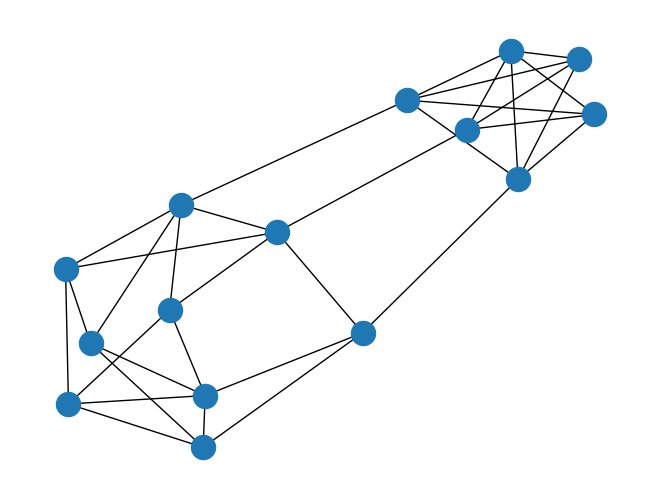

In [6]:
nx.draw_spring(g)

In [7]:
central_edges = [edge
                 for edge, b_centrality
                 in sorted(
                     nx.algorithms.centrality.edge_betweenness_centrality(g).items(),
                     key=lambda kv: kv[1]
                     )[-3:]]
g.remove_edges_from(central_edges)

In [8]:
from functools import reduce
import operator

reduce(operator.mul, map(len, nx.connected_components(g)), 1)

54

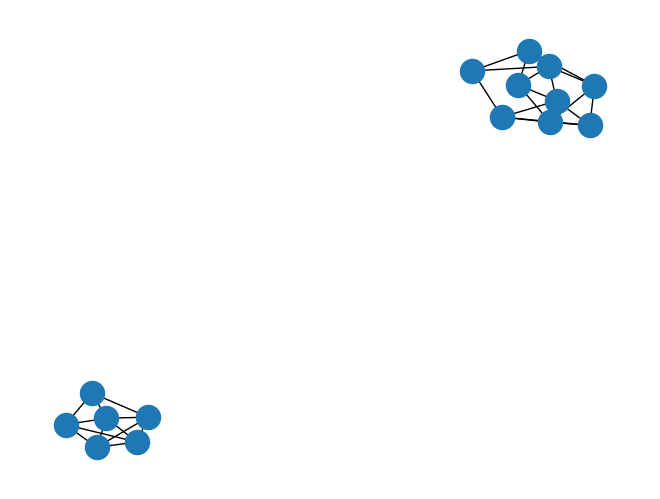

In [9]:
nx.draw_spring(g)